In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/UpdatedResumeDataSet.csv')


In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

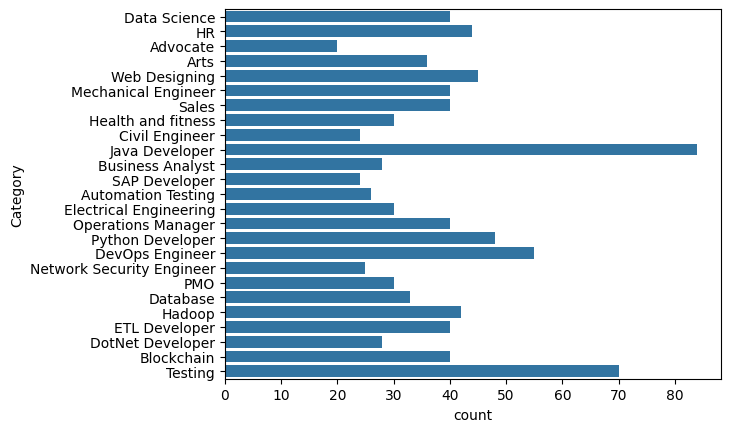

In [6]:
sns.countplot(df['Category'])

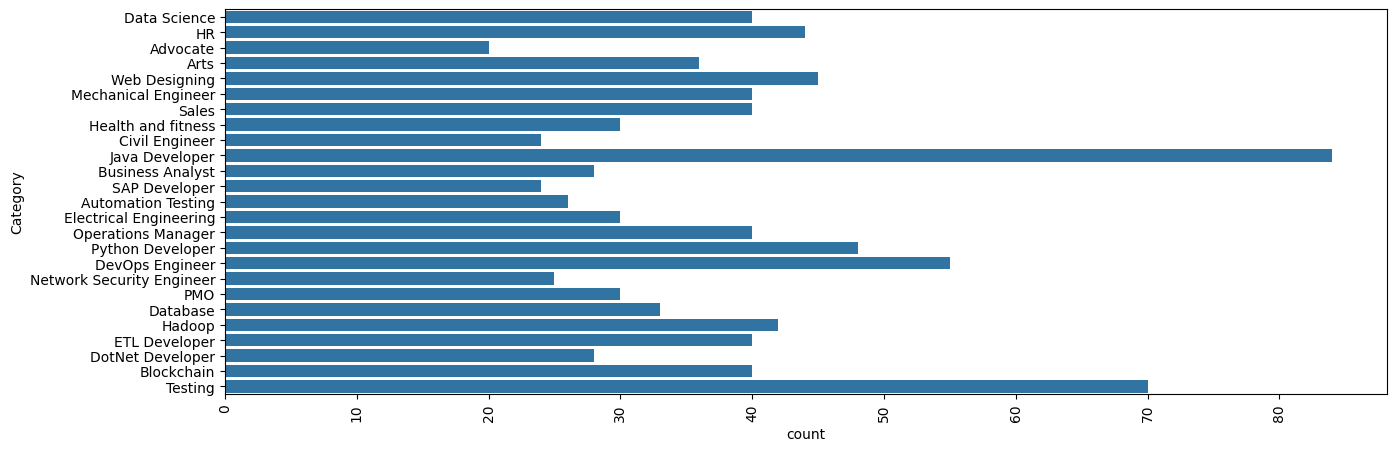

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

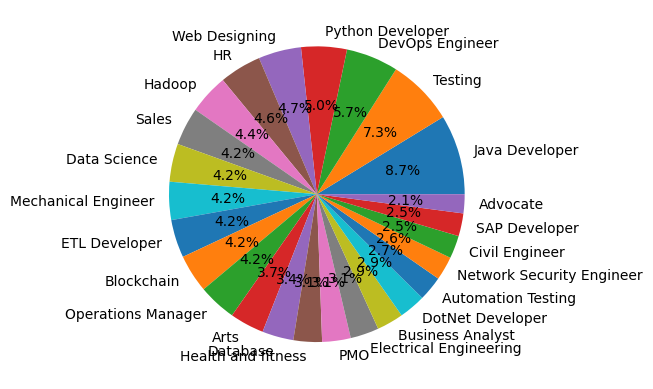

In [8]:
# Get the counts for each category
category_counts = df['Category'].value_counts()

# Plot the pie chart

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')

# Display the chart
plt.show()

In [9]:
%pip install clean-text

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from cleantext import clean

def cleanResume(txt):
    cleanText = clean(
        txt,
        fix_unicode=True,  # Fix unicode issues
        to_ascii=True,  # Convert non-ASCII characters to closest ASCII
        lower=False,  # Convert text to lowercase (optional)
        no_line_breaks=True,  # Remove line breaks
        no_urls=True,  # Remove URLs
        no_emails=True,  # Remove email addresses
        no_phone_numbers=True,  # Remove phone numbers
        no_numbers=False,  # Remove numbers (optional)
        no_digits=False,  # Remove digits (optional)
        no_currency_symbols=True,  # Remove currency symbols (optional)
        no_punct=True,  # Remove punctuations
        replace_with_url=" ",  # Replace removed URLs with space
        replace_with_email=" ",  # Replace removed emails with space
        replace_with_phone_number=" ",  # Replace removed phone numbers with space
        replace_with_number=" ",  # Replace removed numbers with space
        replace_with_digit=" ",  # Replace removed digits with space
        replace_with_currency_symbol=" ",  # Replace removed currency symbols with space
    )
    return cleanText

# Example usage:
cleaned_text = cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

print(cleaned_text)


Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


my noorsaeed webiste like is this httpheloword and access it gmaincom


In [11]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [12]:
cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")


'my webiste like is this and a ess it '

In [13]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
df['Category'] = le.fit_transform(df['Category'])
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
matrix = tfidf.fit_transform(df['Resume'])

In [17]:
print(matrix.shape)
print(df.shape)

(962, 7351)
(962, 2)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(matrix, df['Category'], test_size=0.2, random_state=42)



In [19]:
print(X_train)
print(y_train)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 129201 stored elements and shape (769, 7351)>
  Coords	Values
  (0, 3760)	0.03172146721164895
  (0, 4577)	0.08519657383526581
  (0, 2212)	0.012585941408507141
  (0, 1948)	0.031450299320234645
  (0, 6077)	0.010483433106744882
  (0, 4272)	0.014685225542178364
  (0, 1408)	0.08386746485395906
  (0, 1928)	0.06290059864046929
  (0, 6573)	0.061704558653100705
  (0, 6557)	0.13395113603304126
  (0, 1964)	0.026399331750010118
  (0, 6720)	0.06570711775016477
  (0, 718)	0.049634434619816245
  (0, 5636)	0.08384340329695789
  (0, 6155)	0.027279939862734342
  (0, 3333)	0.02354616717181785
  (0, 7272)	0.04528059768299369
  (0, 3510)	0.05108223468837267
  (0, 4588)	0.03975858745566186
  (0, 6975)	0.04200890608275828
  (0, 1118)	0.152387643942986
  (0, 1117)	0.07261526408039005
  (0, 7025)	0.02183862689593998
  (0, 5740)	0.07366382587785933
  (0, 100)	0.02500567673276624
  :	:
  (768, 3438)	0.09242109976390016
  (768, 7269)	0.1362005101840755

In [20]:
X_train.shape
y_train.shape


(769,)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [35]:
from sklearn.linear_model import LogisticRegression
clf_2 = LogisticRegression(multi_class='ovr')  # OvR strategy for multi-class
clf_2.fit(X_train, y_train)
ypred = clf_2.predict(X_test)
print(accuracy_score(y_test,ypred))


c:\Users\yethu.krishnan\Desktop\yethu_projects\NLP\nlp_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9948186528497409


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf_3 = KNeighborsClassifier()
clf_3.fit(X_train, y_train)
ypred = clf_3.predict(X_test)
print(accuracy_score(y_test, ypred))


0.9844559585492227


In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf_4 = SVC()
clf_4.fit(X_train, y_train)
ypred = clf_4.predict(X_test)
print(accuracy_score(y_test, ypred))


0.9948186528497409


In [22]:
X_test[:5]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 512 stored elements and shape (5, 7351)>

In [23]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [31]:
myresume = """ i am a java developer
"""

In [32]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Java Developer
15
